<a href="https://colab.research.google.com/github/Nisha-Bagdwal/IT7103-Practical-Data-Analytics/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Analysis

Importing the necessary libraries and loading the strokedata.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Practical_Data_Analytics/Assignment_data/stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


According to the above information:
- It seems the columns are loaded into their correct data types.
- The total number of entries in the dataset is 5110, and only one column 'bmi' is missing data, that is around 201 entries. So, I will impute it later during preprocessing.

# Train-Test Split

Splitting the data into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.2) #20% of data will be for testing, 80% for training
traindata.shape, testdata.shape

((4088, 12), (1022, 12))

In [ ]:
traindata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3924.000000,4088.000000
mean,36730.200098,43.180646,0.097114,0.054061,105.731683,28.945591,0.047701
std,21198.999102,22.599653,0.296148,0.226165,44.600978,7.894896,0.213158
min,67.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,17891.000000,25.000000,0.000000,0.000000,77.290000,23.600000,0.000000
50%,37467.000000,45.000000,0.000000,0.000000,91.895000,28.100000,0.000000
75%,54809.000000,61.000000,0.000000,0.000000,113.630000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Visualization
## Histograms

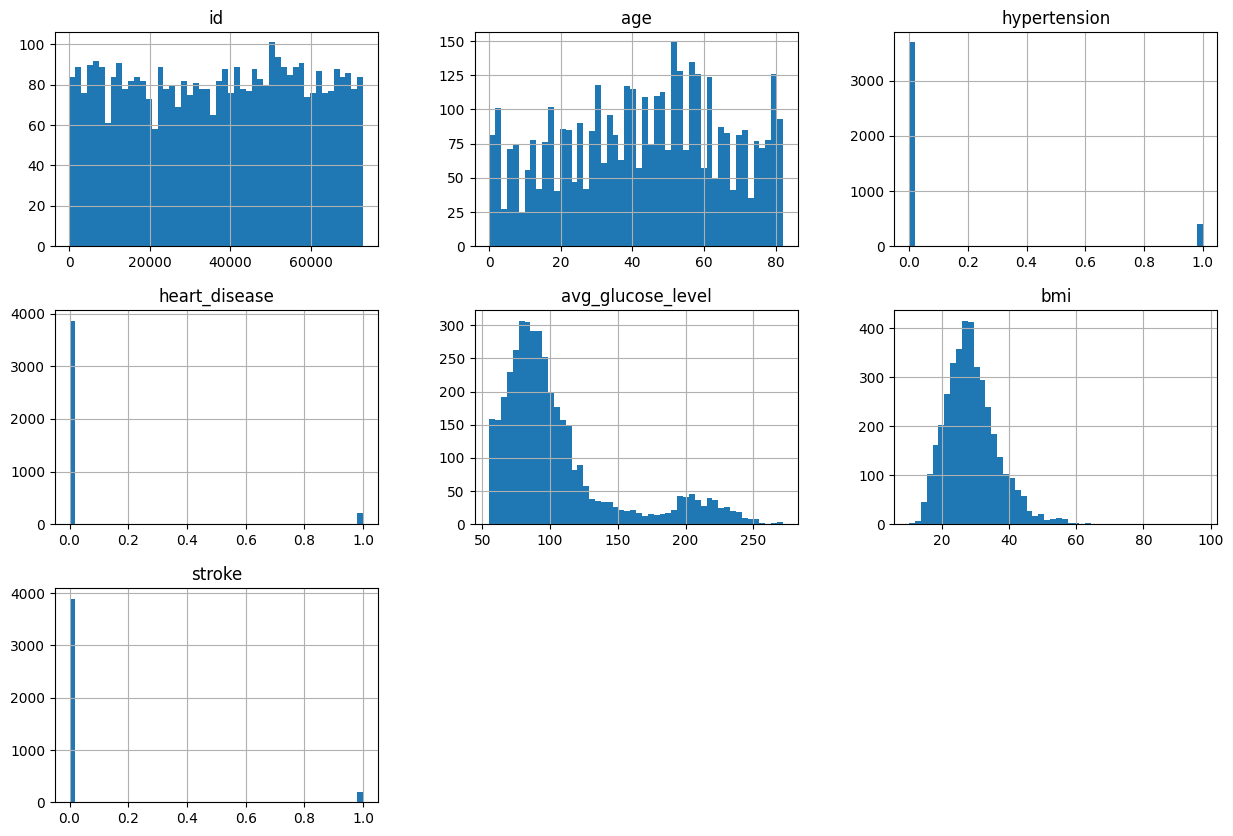

In [ ]:
import matplotlib.pyplot as plt

traindata.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
traindata['hypertension'].unique()

array([0, 1])

In [ ]:
traindata['heart_disease'].unique()

array([0, 1])

In [ ]:
traindata['stroke'].unique()

array([0, 1])

Some analysis on the columns:
- "ID" columns are usually not of interests, so I will drop column 'id'.
- 'age' column looks symmetric.
- 'bmi' and 'avg_glucose_level' looks skewed
- 'hypertension', 'heart_disease', and 'stroke' have only two types of values, i.e. binary data.

In [ ]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('id')
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Boxplots

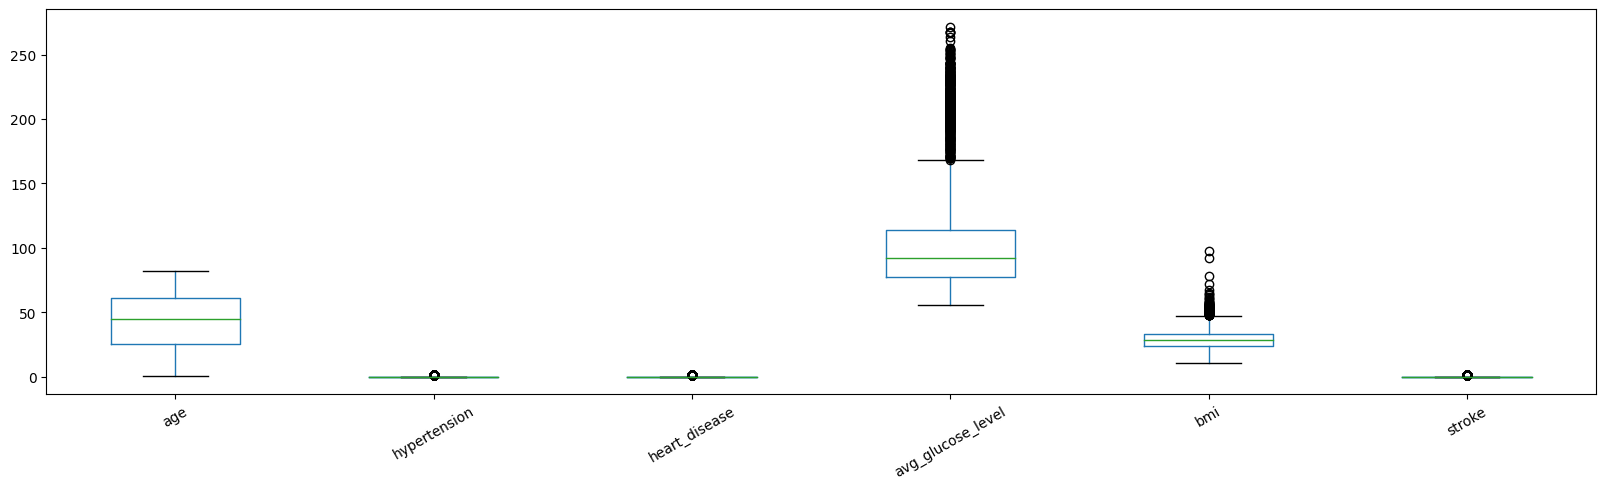

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

With a boxplot, we can clearly see that the numeric columns have very different ranges. This will need to be addressed in preprocessing with a process called standardization.

# Bar Chart

Finally, for categorical columns, we can filter all that has dtypes of object

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Drawing a bar chart for each column.

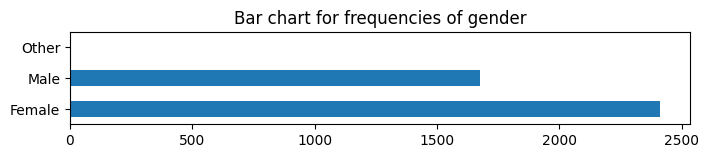

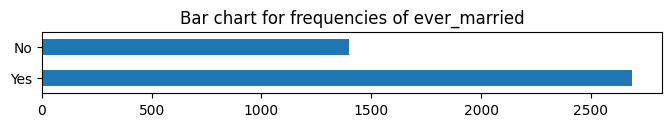

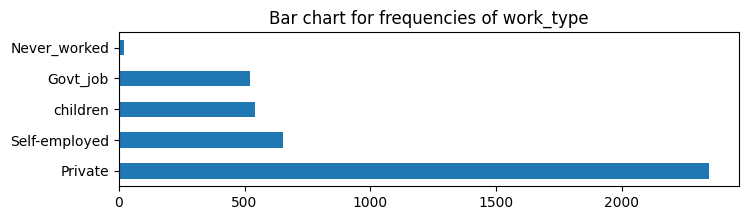

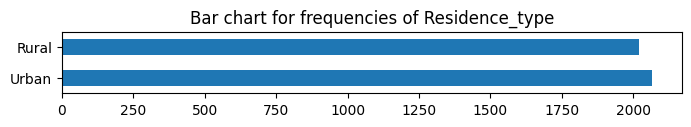

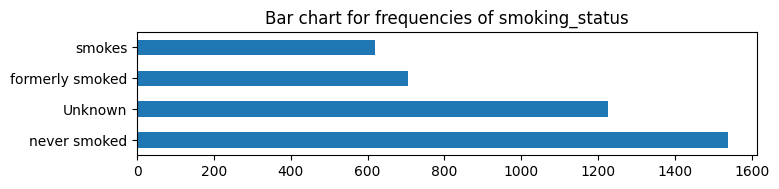

In [ ]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

From the bar chart, all categorical columns look alright.

# Preprocessing

For preprocessing, I will use a very powerful tool that is called a pipeline that comes with scikit-learn.

In this project, the data will be transformed as follows:

- Symmetric numeric columns: Imputation --> Standardization
- Skewed numeric columns: Imputation --> Log Transformation --> Standardization
- Categorical columns: One hot encoder


Listing the columns for each type of transformation. Here, any columns that are not listed will be dropped from the processed data. Therefore, I will not list id.

In [ ]:
num_cols = ['age', 'hypertension', 'heart_disease']                                                           # Numeric and symmetric columns
log_cols = ['avg_glucose_level', 'bmi']                                                                       # Numeric and skewed columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']                        # Categorical columns
target = 'stroke'                                                                                             # Target column

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           # pipeline for numeric and symmetric columns
    ('standardize', StandardScaler())               # only scaling is required for symmetric numeric columns, there are no missing values
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        # pipeline for numeric and skewed columns
    ('impute', SimpleImputer(strategy='median')),                # impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)),  # include a log transformation into the pipeline
    ('standardize', StandardScaler())                            # scale all numeric log columns
])

processing_pipeline = ColumnTransformer([                                                      # merge the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       # numeric columns
    ('log', log_pipeline, log_cols),                                                           # numeric log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) # encoder to transform class columns to numeric, this will automatically handle missing data
  ])

# Modeling

Here, column 'stroke' is the target column. Even though the datatype of this column is integer, it only has binary values, so I will consider this as a class column, because a patient either belongs to class of not having a stroke or having a stroke.
As the target is a class column, this is a classification problem. I will try the below three different models for this problem.

- Logistic Regression
- Support Vector Machine
- Random Forest

In [ ]:
percentage_of_ones = (traindata[target].value_counts(normalize=True) * 100).get(1, 0)

print(f"Percentage of '1' in Target(stroke) column: {percentage_of_ones:.2f}%")

Percentage of '1' in Target(stroke) column: 4.77%


As we can see that the number of 1s in the target column is just around 5% and the number of 0s is around 95%. This means that the target column is imbalanced and highly biased. So, accuracy would not be a good evaluation metric in this case, as it can be misleading because it does not consider the class distribution. So I will choose F1 score as my evaluation metric as it provides a balance between precision and recall.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression(max_iter=5000, solver='saga'))
])

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'logistic__penalty' : ['l2', 'l1'],                        #grid for penalty = l2 and penalty = l1
     'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'logistic__penalty' : ['elasticnet'],                      #grid for penalty = elasticnet
     'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'logistic__l1_ratio' : [0.1, 0.25, 0.5, 0.75, 0.9]}
]

grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='f1', return_train_score=True)

grid_search.fit(traindata,traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7cc3b6ca6b00>)),
                                                                                         (...
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])])),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000,
                                                           solver='saga'))]),
             param_grid=[{'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logistic__penalty': ['l2', 'l1']},
                         {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logistic__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                          'logistic__penalty': ['elasticnet']}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7cc3b6ca6b00>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('logistic',
                 LogisticRegression(C=1, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [ ]:
grid_search.best_score_

0.009756097560975608

In [ ]:
grid_search.score(testdata, testdata[target])

0.03636363636363636

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = Pipeline([
    ('processing', processing_pipeline),
    ('svc', SVC())
])

param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10, 100]},
    {'svc__kernel':['poly'],
     'svc__degree' : [2, 3],
     'svc__C' : [0.001, 0.1, 1, 10, 100]},
    {'svc__kernel':['rbf'],
     'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
     'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

SVM has fairly high complexity and does not scale with large datasets.

In this case, we may sample a smaller subset of the training data and train there. We will simply perform another train_test_split.

In [ ]:
traindata.shape

(4088, 12)

In [ ]:
train_sample, _ = train_test_split(traindata, test_size=0.5)

In [ ]:
train_sample.shape

(2044, 12)

Then fit the pipeline on the sampled data.

In [ ]:
grid_search.fit(train_sample,train_sample[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7cc3b6ca6b00>)),
                                                                                         (...
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.1, 1, 10, 100],
                          'svc__degree': [2, 3], 'svc__kernel': ['poly']},
                         {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7cc3b6ca6b00>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('svc', SVC(C=0.001, kernel='linear'))])

In [ ]:
grid_search.best_score_

0.9380637615299452

In [ ]:
grid_search.score(testdata, testdata[target])

0.9214605316209226

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

rfc = Pipeline([
    ('processing', processing_pipeline),
    ('rfc', RandomForestClassifier())
])

data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = {
    'rfc__n_estimators' : [10, 25, 50],
    'rfc__max_depth' : [3, 4, 5],
    'rfc__min_samples_split' : [data_size//20, data_size//15, data_size//10, data_size//5],
    'rfc__min_samples_leaf' : [data_size//20, data_size//15, data_size//10, data_size//5],
    'rfc__max_features' : [n_features//4, n_features//3, n_features//2, n_features],
    'rfc__max_leaf_nodes' : [5, 10, 15, 20]
}


grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1', return_train_score=True)

In [ ]:
grid_search.fit(traindata,traindata[target])

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.score(testdata, testdata[target])